In [2]:
import pandas as pd

df_before = pd.read_csv("conservative_comments_before.csv", index_col=0)
df_after = pd.read_csv("conservative_comments.csv", index_col=0)

print(df_before.shape)
print(df_after.shape)

(314109, 15)
(1497522, 15)


In [5]:
df_complete = df_before.append(df_after)

original_size = df_complete.shape[0]

print(df_complete.shape)

(1811631, 15)


In [6]:
df_complete = df_complete.drop_duplicates()

print(original_size - df_complete.shape[0])

22406


In [8]:
print(df_complete.shape)
print(df_complete['created_utc'].max())
print(df_complete['created_utc'].min())

(1789225, 15)
1610964501.0
1602720002.0


In [9]:
df_complete = df_complete.sort_values(by=['created_utc'])

print(df_complete['created_utc'])

0          1.602720e+09
1          1.602720e+09
2          1.602720e+09
3          1.602720e+09
4          1.602720e+09
               ...     
1497517    1.610964e+09
1497518    1.610964e+09
1497519    1.610964e+09
1497520    1.610964e+09
1497521    1.610965e+09
Name: created_utc, Length: 1789225, dtype: float64


In [10]:
df_complete.to_csv("conservative_comments.csv")

In [2]:
import pandas as pd

df_sanity_check = pd.read_csv("conservative_comments.csv", index_col=0)

print(df_sanity_check.shape)

(1789225, 15)


In [1]:
'''
    Duplicate sanity check.
'''

import pandas as pd

df = pd.read_csv("conservative_comments_november.csv", index_col=0)

print(df.shape)

df = df.drop_duplicates()

print(df.shape)

(1497522, 15)
(1497522, 15)


In [2]:
'''
    Read the raw CSV file.
'''
import pandas as pd

df = pd.read_csv("conservative_comments_november.csv", index_col=0)

if df is not None:
    print("CSV file successfully read. Here's the shape.")
    print(df.shape)

CSV file successfully read. Here's the shape.
(1497522, 15)


In [3]:
'''
    Add the datetime column to the dataframe.
'''

import datetime as dt

df['created_date'] = df.apply(
    lambda row: dt.datetime.fromtimestamp(row['created_utc']), 
    axis=1)

In [4]:
'''
    Round down the datetime to the nearest hour.
'''

df['created_hour'] = df.apply(lambda row: row['created_date'].replace(
    microsecond = 0,
    second = 0,
    minute = 0
), axis=1)

In [5]:
with pd.option_context('display.max_rows', None):
    series = df.groupby(['created_hour']).size()
    # print(series)

series.index = pd.to_datetime(series.index)
index = pd.date_range('2020-10-31', '2021-01-20', freq='H')
series = series.reindex(index, fill_value=0)

with pd.option_context('display.max_rows', None):
    print(series)



00:00     592
2020-12-21 08:00:00     790
2020-12-21 09:00:00     977
2020-12-21 10:00:00    1107
2020-12-21 11:00:00    1046
2020-12-21 12:00:00    1304
2020-12-21 13:00:00    1225
2020-12-21 14:00:00    1144
2020-12-21 15:00:00    1003
2020-12-21 16:00:00     929
2020-12-21 17:00:00    1172
2020-12-21 18:00:00    1036
2020-12-21 19:00:00     815
2020-12-21 20:00:00     708
2020-12-21 21:00:00     667
2020-12-21 22:00:00     547
2020-12-21 23:00:00     439
2020-12-22 00:00:00     349
2020-12-22 01:00:00     226
2020-12-22 02:00:00     173
2020-12-22 03:00:00     180
2020-12-22 04:00:00     178
2020-12-22 05:00:00     203
2020-12-22 06:00:00     295
2020-12-22 07:00:00     456
2020-12-22 08:00:00     735
2020-12-22 09:00:00     852
2020-12-22 10:00:00     850
2020-12-22 11:00:00     787
2020-12-22 12:00:00     778
2020-12-22 13:00:00     860
2020-12-22 14:00:00     757
2020-12-22 15:00:00     855
2020-12-22 16:00:00     944
2020-12-22 17:00:00    1059
2020-12-22 18:00:00    1138
2020-1

In [6]:
'''
    Testing a request.
'''
# from api_helpers import *
# import datetime as dt

# start = dt.datetime(2020, 11, 4, 22).timestamp()
# end = dt.datetime(2020, 11, 4, 23).timestamp()


# data = send_request(after=start, before=end, subreddit="globaloffensive")

# print(len(data))

'\n    Testing a request.\n'

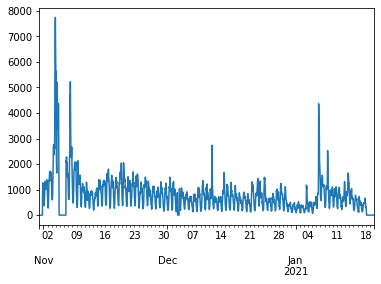

In [7]:
fig = series.plot().get_figure()

fig.savefig("conservative_comments.png")